In [99]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [100]:
# Read the data from 'poly.csv' into a Pandas dataframe
df = pd.read_csv('poly.csv')

# Take a quick look at the dataframe
df.head(-1)


,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819
...,...,...
194,0.430170,-3.775634
195,2.514639,-7.466110
196,-0.315372,-0.956202
197,-0.470512,-0.542052


In [101]:
# Get the column values for x & y as numpy arrays
x = df[['x']].values
y = df['y'].values

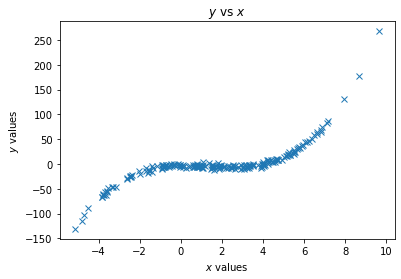

In [102]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show();


In [103]:
# Split the data into train and test sets
# Set the train size to 0.8 and random state to 22
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=22)


In [104]:
# Initialize a linear model
model = LinearRegression()

# Fit the model on the train data
model.fit(x_train,y_train)

# Get the predictions on the test data using the trained model
y_lin_pred = model.predict(x_test)


In [105]:
### edTest(test_deg) ###

# Guess the correct polynomial degree based on the above graph
guess_degree = 3
# Generate polynomial features on the train data
x_poly_train= PolynomialFeatures(degree=guess_degree).fit_transform(x_train)

# Generate polynomial features on the test data
x_poly_test= PolynomialFeatures(degree=guess_degree).fit_transform(x_test)


In [106]:
# Initialize a model to perform polynomial regression
polymodel = LinearRegression()

# Fit the model on the polynomial transformed train data
polymodel.fit(x_poly_train,y_train)

# Predict on the entire polynomial transformed test data
y_poly_pred = polymodel.predict(x_poly_test)


In [107]:
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y_test
# y_test values corresponding to sorted test data
y_test = y_test[idx]

# Linear predicted values  
y_lin_pred = y_lin_pred[idx]

# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]


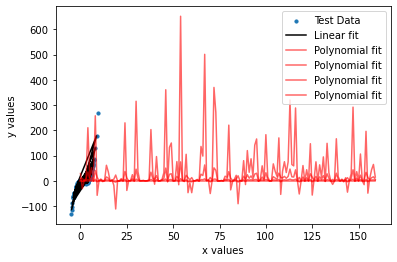

In [108]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Test Data")

# Plot the linear regression fit curve
plt.plot(x_train,y_train,label="Linear fit", color='k')

# Plot the polynomial regression fit curve
plt.plot(x_poly_train,  label="Polynomial fit", color='red', alpha=0.6)

# Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show();


In [109]:
### edTest(test_poly_predictions) ###
# Calculate the residual values for the polynomial model
poly_residuals =  y_test - y_poly_pred




In [110]:
### edTest(test_linear_predictions) ###
# Calculate the residual values for the linear model
lin_residuals = y_test - y_lin_pred


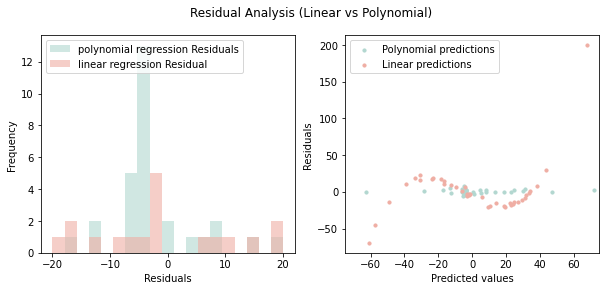

In [111]:
# Helper code to plot the residual values
# Plot the histograms of the residuals for the two cases

# Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

# Plot the histograms for the polynomial regression
ax[0].hist(y_poly_pred, bins, label = "polynomial regression Residuals", color='#B2D7D0', alpha=0.6)

# Plot the histograms for the linear regression
ax[0].hist(y_lin_pred, bins, label = "linear regression Residual", color='#EFAEA4', alpha=0.6)

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10, color='#B2D7D0', label='Polynomial predictions')
ax[1].scatter(y_lin_pred, lin_residuals, s = 10, color='#EFAEA4', label='Linear predictions' )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')
ax[1].legend(loc = 'upper left')

fig.suptitle('Residual Analysis (Linear vs Polynomial)')
plt.show();


⏸ Do you think that polynomial degree is appropriate. Experiment with a degree of polynomial of 2 and comment on what you observe for the residuals?

In [112]:
### edTest(test_chow1) ###
# Type your answer within in the quotes given
answer1 = '2'
